In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.animation as animation
import sys
sys.path.append('demo_python_backend_files')
from ipywidgets import interact
from ipywidgets import widgets

class curvature_test:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.w = 0
        
    # build cost function
    def build_n_solve_cost(self,ax1,ax2,xsample,ysample):
        # solve least squares problem for optimal weights
        w = sum([u*v for u,v in zip(xsample,ysample)])/(sum(xsample**2))
        
        # plot fit
        s = np.linspace(-2,2)
        ax1.plot(s,w*s,c = 'r')
        
        # plot associated cost
        cost=[]
        s = np.linspace(-4,4)
        for i in range(len(s)):
            w = s[i]
            t = sum((xsample*w - ysample)**2)
            cost.append(t)
        ax2.plot(s,cost,c = 'k')
       
    # plot data
    def plot_data(self,ax,xsample,ysample):
        ax.scatter(xsample,ysample,color = 'k',linewidth = 1,marker = 'o',edgecolor = 'w',s = 40)
        
    # build dataset
    def build_data(self,num_pts):
        x = 4*np.random.rand(num_pts) - 2
        y = x + 0.2*np.random.randn(len(x))
        
        # store as global
        self.x = x
        self.y = y
        
    # build animation
    def animate_this(self):
        # produce figure
        # animation subfunc
        def show_fit(p):

            fig = plt.figure(num=None, figsize=(7,3), dpi=80, facecolor='w', edgecolor='k')
            ax1 = plt.subplot(121)
            ax2 = plt.subplot(122)
            fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure

            
            # define
            xsample = self.x[:p]
            ysample = self.y[:p]
            
            # plot left panel
            self.plot_data(ax1,xsample,ysample)      

            # plot right panel
            self.build_n_solve_cost(ax1,ax2,xsample,ysample)
            
            # clean up panels
            ax2.set_ylim([-1,100])

        interact(show_fit, p=widgets.IntSlider(min=1,max=(len(self.x)),step=1,value=1))

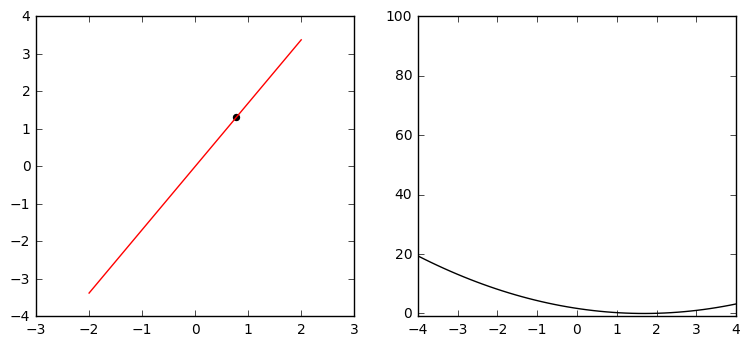

In [17]:
tester = curvature_test()
tester.build_data(num_pts= 40)
tester.animate_this()